In [25]:
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('train.tsv', sep='\t')

In [27]:
df.head()

,0,1,1.1,1.2,1.3,0.1,1.4,1.5,0.2,1.6,...,0.42,0.43,0.44,1.49,1.50,1.51,1.52,0.45,0.46,1.53
0,0,1,0,1,1,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1
1,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,0
3,1,1,0,0,1,1,0,0,0,0,...,1,0,1,0,1,1,1,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,1,1,0,1,1,0,0,0,1,0


## Задача: большинство признаков - шум. Необходимо построить классификатор, точностью > 0,5

In [28]:
df.columns = range(1, df.shape[1] + 1)

In [29]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
0,0,1,0,1,1,0,1,0,0,0,...,0,1,1,1,1,1,0,1,1,1
1,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,0,1,0
3,1,1,0,0,1,1,0,0,0,0,...,1,0,1,0,1,1,1,0,0,0
4,1,1,0,0,0,1,0,0,0,1,...,1,1,0,1,1,0,0,0,1,0


In [30]:
X = df.iloc[:, :-1]
#df.drop(101, axis=0).head()
y = df[101]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0,1,0,1,1,0,1,0,0,0,...,1,0,1,1,1,1,1,0,1,1
1,1,0,0,1,1,0,1,0,0,1,...,1,0,1,0,0,0,1,1,0,0
2,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,0,1
3,1,1,0,0,1,1,0,0,0,0,...,0,1,0,1,0,1,1,1,0,0
4,1,1,0,0,0,1,0,0,0,1,...,1,1,1,0,1,1,0,0,0,1


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Object `from` not found.


In [27]:
??train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 1234)
# random_state - воспроизводимость(по умолчанию в выборки попадают произвольные записи)

In [33]:
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
y_predict = tree.predict(X_test)

In [35]:
y_predict[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score 

In [37]:
accuracy_score(y_test, y_predict)

0.5596

In [38]:
from sklearn.externals.six import StringIO

In [39]:
from IPython.display import Image

In [40]:
from sklearn.tree import export_graphviz

In [17]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 8.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [41]:
import pydotplus

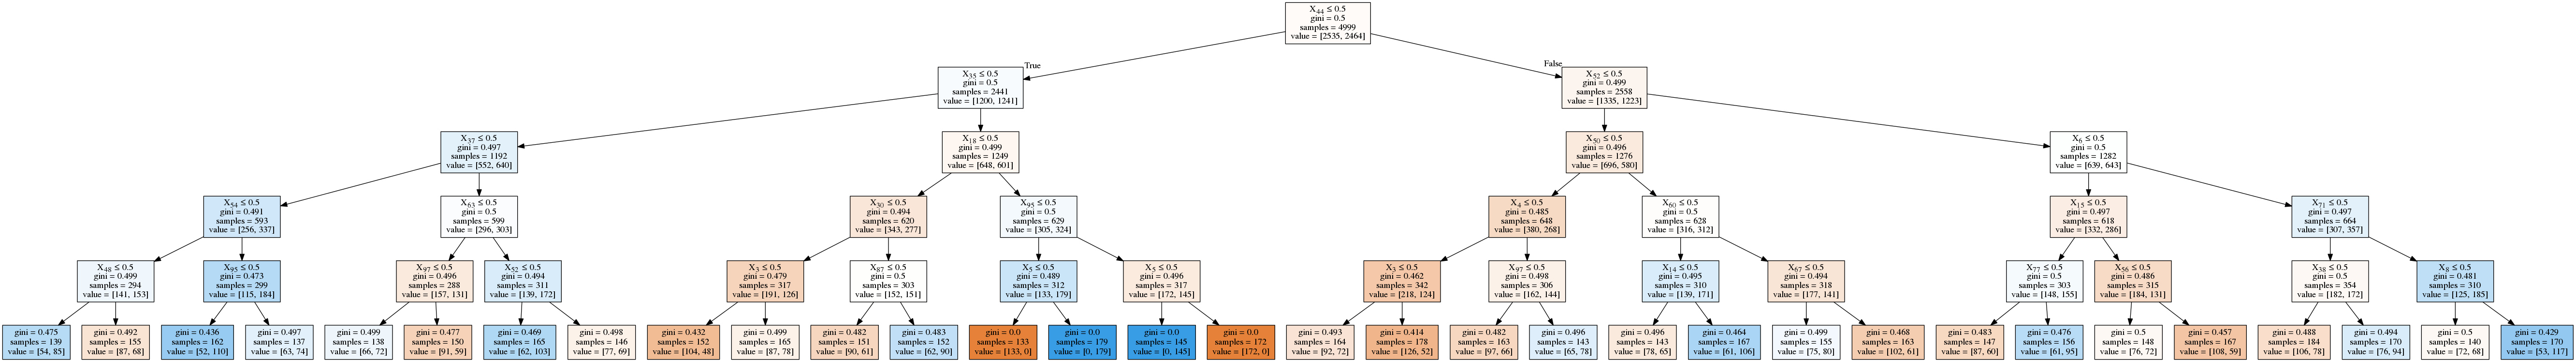

In [42]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [1]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):

    """ Draws a representation of a random forest in IPython.



    Parameters:

    -----------

    t: The tree you wish to draw

    df: The data used to train the tree. This is used to get the names of the features.

    """

    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,

                      special_characters=True, rotate=True, precision=precision)

    IPython.display.display(graphviz.Source(re.sub('Tree {',

       f'Tree {{ size={size}; ratio={ratio}', s)))

In [44]:
import IPython
import re
import graphviz

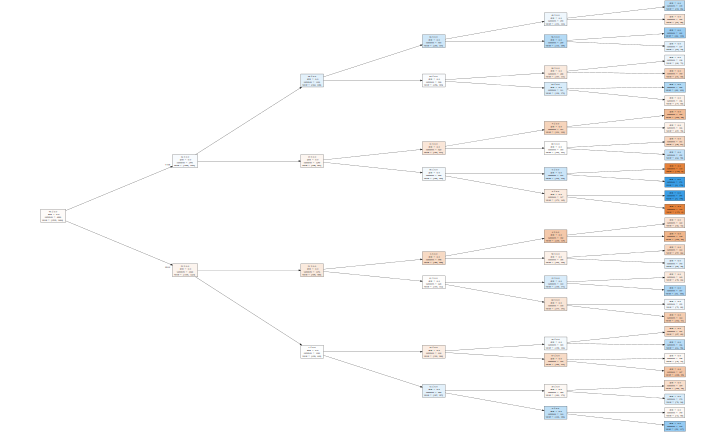

In [45]:
draw_tree(tree, X)

In [46]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.round(tree.feature_importances_, 3)
})

In [47]:
importances.sort_values("importance", ascending=False)

,feature,importance
5,6,0.747
3,4,0.018
95,96,0.017
52,53,0.015
8,9,0.015
77,78,0.015
97,98,0.013
87,88,0.013
14,15,0.012
50,51,0.011


### А теперь: 
    1)Определите, какие из оставшихся признаков - шум
    2) Получите функцию, с помощью которой генерировались данные
### Для этого:
    Возьмите все признаки с ненулевой важностью и постройте дерево в исходном датафрейме (серьёзно?!)

#### Первый раз

In [48]:
X1 = X[importances.loc[importances.importance > 0.006, 'feature']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state = 1234)

In [50]:
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_predict = tree.predict(X_test)

In [52]:
y_predict[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [53]:
accuracy_score(y_test, y_predict)

0.6106

In [54]:
importances = pd.DataFrame({
    'feature': X1.columns,
    'importance': np.round(tree.feature_importances_, 3)
})

In [55]:
importances.sort_values("importance", ascending=False)

,feature,importance
2,6,0.914
10,39,0.012
3,7,0.010
9,36,0.010
0,4,0.009
5,15,0.008
18,72,0.007
21,96,0.005
1,5,0.005
12,51,0.004


#### Второй раз

In [56]:
X2 = X[importances.loc[importances.importance > 0.002, 'feature']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.5, random_state = 1234)

In [58]:
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
y_predict = tree.predict(X_test)

In [60]:
y_predict[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [61]:
accuracy_score(y_test, y_predict) # !!!!!!!!!

1.0

In [62]:
importances = pd.DataFrame({
    'feature': X2.columns,
    'importance': np.round(tree.feature_importances_, 3)
})

In [63]:
importances.sort_values("importance", ascending=False)

,feature,importance
2,6,0.999
11,96,0.001
0,4,0.000
1,5,0.000
3,7,0.000
4,15,0.000
5,31,0.000
6,36,0.000
7,39,0.000
8,51,0.000


#### Последний раз 

In [64]:
X_fin = X[[6, 96]]

In [65]:
X_fin

,6,96
0,0,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,0,1
9,1,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_fin, y, test_size=0.5, random_state = 1234)

In [67]:
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
y_predict = tree.predict(X_test)

In [69]:
accuracy_score(y_test, y_predict) 

1.0

In [70]:
importances = pd.DataFrame({
    'feature': X_fin.columns,
    'importance': np.round(tree.feature_importances_, 3)
})

In [71]:
importances.sort_values("importance", ascending=False)

,feature,importance
0,6,0.999
1,96,0.001


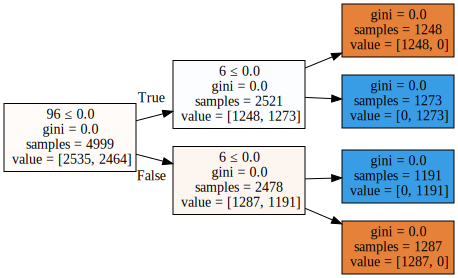

In [72]:
draw_tree(tree, X_fin) # определяем функцию что-то не так

### Итого: исключающее ИЛИ

In [7]:
??sclearn.tree

Object `sclearn.tree` not found.
